In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import StratifiedKFold,KFold,cross_validate
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.model_selection import train_test_split
import scipy.stats
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import confusion_matrix,classification_report,roc_curve
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_predict,cross_val_score,GridSearchCV,train_test_split
import warnings
warnings.simplefilter(action='ignore')
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn import preprocessing

In [2]:
ho=pd.read_csv('DS2_C5_S6_AllRent_Data_Challenge.csv')
ho.head()

,Unnamed: 0,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
0,105408,1.0,0,0f9d07991ba14c82d3d368b72d90270a,04-04-2016 03:34,Gorgeous unit in one of the most genuinely cov...,230 Central Park South,"['Cats Allowed', 'Dogs Allowed', 'Doorman', 'E...",40.7672,6827153,-73.9802,932589de9230b697808216774fa26bd4,['https://photos.renthop.com/2/6821519_0a14cc2...,2800,230 Central Park South,high
1,110219,1.0,1,564d6f608f41e8d4a5e181c4e068e3d9,21-04-2016 20:40,Enormous 1 bedroom apartment in Murray Hill. F...,E 39th St,"['Cats Allowed', 'Dogs Allowed', 'Reduced Fee'...",40.7483,6908998,-73.9741,489ad933197469ae66acd1f7ce18f908,['https://photos.renthop.com/2/6908998_6b00895...,2100,243 E 39th St,high
2,56113,1.0,1,69790fbf0bf7e22b1d0ebc721cf0f633,14-05-2016 05:44,"This 1 bedroom, 1 bathroom spacious apartment ...",E 25th St.,"['Elevator', 'Furnished', 'Hardwood Floors']",40.7399,7013774,-73.9812,792c0f1ad1431397c65db3e69b770928,['https://photos.renthop.com/2/7013774_e7ead5d...,3000,217 E 25th St.,high
3,37765,1.0,2,d0234abbc01a982d54e8d446acc03405,05-06-2016 03:37,SPECTACULAR2 BEDROOM APARTMENT IN LUXURY 24HR ...,West 34th Street,"['Doorman', 'Elevator', 'Dishwasher', 'Hardwoo...",40.7530,7113518,-73.9958,eb5a6c4c2eb6f3e2a085c477afd5a815,['https://photos.renthop.com/2/7113518_d234153...,3000,360 West 34th Street,high
4,67397,1.0,2,a36895b9975c6991ca0fa1d9a99023a1,26-05-2016 05:36,NO FEE.. Newly Reno XL Convertible 2 Br .. Pri...,East 72nd Street,"['Dining Room', 'Doorman', 'Elevator', 'Fitnes...",40.7695,7071666,-73.9603,0a6ba20b892ed61df751420934d1ab51,['https://photos.renthop.com/2/7071666_4f81618...,3300,200 East 72nd Street,high


In [3]:
ho2=ho.copy()

In [4]:
ho=ho.drop(['features','Unnamed: 0','building_id','created','description','display_address','latitude','listing_id','longitude','manager_id','photos','street_address'],axis=1)

<AxesSubplot:>

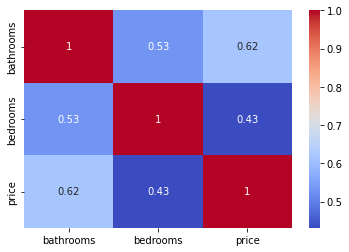

In [5]:
sns.heatmap(ho.corr(),cmap='coolwarm',annot=True)

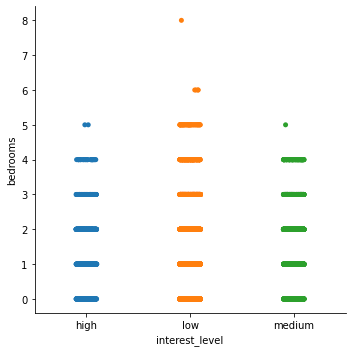

In [6]:
sns.catplot(data=ho,x='interest_level',y='bedrooms')

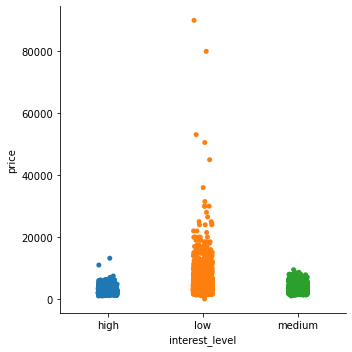

In [7]:
sns.catplot(data=ho,x='interest_level',y='price')

In [8]:
ho.isnull().sum()

bathrooms         0
bedrooms          0
price             0
interest_level    0
dtype: int64

In [9]:
ho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bathrooms       9871 non-null   float64
 1   bedrooms        9871 non-null   int64  
 2   price           9871 non-null   int64  
 3   interest_level  9871 non-null   object 
dtypes: float64(1), int64(2), object(1)
memory usage: 308.6+ KB


In [10]:
X=ho.drop('interest_level',axis=1)
y=ho['interest_level']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=88)

In [12]:
model41=DecisionTreeClassifier()
model43=SVC()

In [13]:
model41.fit(X_train,y_train)
model43.fit(X_train,y_train)

SVC()

In [14]:
model41_train_pred = model41.predict(X_train)
model43_train_pred = model43.predict(X_train)

In [15]:
label_encoder=preprocessing.LabelEncoder()

In [17]:
model4_train_X = {'DTR':model41_train_pred,'SVR':model43_train_pred}
model4_train_X = pd.DataFrame(model4_train_X)
for i in model4_train_X.columns:
    model4_train_X[i]=label_encoder.fit_transform(model4_train_X[i])
model4_train_X

,DTR,SVR
0,1,0
1,1,0
2,2,0
3,1,0
4,1,0
...,...,...
6904,1,0
6905,1,0
6906,1,0
6907,1,0


In [18]:
model41_test_pred = model41.predict(X_test)
model43_test_pred = model43.predict(X_test)

In [19]:
model4_test_X = {'DTC':model41_test_pred,'SVC':model43_test_pred}
model4_test_X = pd.DataFrame(model4_test_X)
for i in model4_test_X.columns:
    model4_test_X[i]=label_encoder.fit_transform(model4_test_X[i])
model4_test_X

,DTC,SVC
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
2957,1,0
2958,1,0
2959,1,0
2960,1,0


In [22]:
model1=LogisticRegression()
model2=RandomForestClassifier(n_estimators=100,max_depth=5,n_jobs=-1,random_state=88,oob_score=True)
model3=ada = AdaBoostClassifier(n_estimators=10,learning_rate=1.0,random_state =88)
model4=LogisticRegression()

In [23]:
model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)
model4.fit(model4_train_X,y_train)

LogisticRegression()

In [24]:
print(model1.__class__.__name__,model1.score(X_train,y_train))
print(model2.__class__.__name__,model2.score(X_train,y_train))
print(model3.__class__.__name__,model3.score(X_train,y_train))
print('Model stacking using Logistic Regression with DTC and SVC',model4.score(model4_train_X,y_train))

LogisticRegression 0.6934433347807208
RandomForestClassifier 0.7003907946157186
AdaBoostClassifier 0.6917064698219714
Model stacking using Logistic Regression with DTC and SVC 0.772760167896946


In [25]:
y_pred1=model1.predict(X_test)
y_pred2=model2.predict(X_test)
y_pred3=model3.predict(X_test)
y_pred4=model4.predict(model4_test_X)

In [26]:
print(model1.__class__.__name__,model1.score(X_test,y_test))
print(model2.__class__.__name__,model2.score(X_test,y_test))
print(model3.__class__.__name__,model3.score(X_test,y_test))
print('Model stacking using Logistic Regression with DTC and SVC',model4.score(model4_test_X,y_test))

LogisticRegression 0.6924375422012155
RandomForestClassifier 0.7002025658338961
AdaBoostClassifier 0.6843349088453747
Model stacking using Logistic Regression with DTC and SVC 0.6711681296421337


In [29]:
modelcomp={'Model_Name':[model1.__class__.__name__,model2.__class__.__name__,model3.__class__.__name__,'Stacking-Logistic(DTR,SVR)'],
           'Training_Score':[model1.score(X_train,y_train),model2.score(X_train,y_train),model3.score(X_train,y_train),model4.score(model4_train_X,y_train)],
          'Testing_Score':[model1.score(X_test,y_test),model2.score(X_test,y_test),model3.score(X_test,y_test),model4.score(model4_test_X,y_test)]}

In [30]:
modelcompdf=pd.DataFrame(modelcomp)
modelcompdf

,Model_Name,Training_Score,Testing_Score
0,LogisticRegression,0.693443,0.692438
1,RandomForestClassifier,0.700391,0.700203
2,AdaBoostClassifier,0.691706,0.684335
3,"Stacking-Logistic(DTR,SVR)",0.772760,0.671168
